## **Import Libraries:**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

In [2]:
daily = pd.read_csv("/content/daily_data.csv")
hourly = pd.read_csv("/content/hourly_data.csv")
monthly = pd.read_csv("/content/monthly_data.csv")
three_hour = pd.read_csv("/content/three_hour_data.csv")

In [3]:
daily.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08


In [4]:
hourly.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T00:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,46,30.05,29.72,10.0,18,150,10,9/8/2006
1,72518014735,2015-01-01T01:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,48,30.04,29.71,10.0,18,170,8,9/8/2006
2,72518014735,2015-01-01T02:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,20,0,52,30.03,29.7,10.0,16,180,6,9/8/2006
3,72518014735,2015-01-01T03:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,19,0,57,30.03,29.7,10.0,16,190,7,9/8/2006
4,72518014735,2015-01-01T04:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,21,0,52,30.04,29.71,10.0,17,170,8,9/8/2006


In [5]:
monthly.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
0,72518014735,2015-01-31T23:59:00,SOM,6,8.9,PRECIP,260,PLASTIC,42.6918,-73.83109,...,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0,2006-09-08
1,72518014735,2015-02-28T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0,2006-09-08
2,72518014735,2015-03-31T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,29.8,29.56,17.0,1251.0,20.7,30.10,29.76,1.25,929.0,2006-09-08
3,72518014735,2015-04-30T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,47.8,29.54,21.0,451.0,36.9,29.98,29.66,2.10,520.0,2006-09-08
4,72518014735,2015-05-31T23:59:00,SOM,6,8.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,65.6,29.71,12.0,1251.0,52.8,30.09,29.77,1.05,235.0,2006-09-08


In [6]:
three_hour.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T01:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.09,8,46,30.05,29.72,9.94,18,150,10,9/8/2006
1,72518014735,2015-01-01T04:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.02,6,57,30.03,29.7,9.94,16,190,7,9/8/2006
2,72518014735,2015-01-01T07:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.02,1,52,30.05,29.72,9.94,17,160,9,9/8/2006
3,72518014735,2015-01-01T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.01,3,44,30.06,29.72,9.94,21,180,11,9/8/2006
4,72518014735,2015-01-01T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.11,8,38,29.95,29.62,9.94,23,170,15,9/8/2006


In [7]:
daily.shape

(2668, 32)

In [8]:
hourly.shape

(64729, 22)

In [9]:
monthly.shape

(87, 46)

In [10]:
three_hour.shape

(20843, 22)

In [13]:
daily.dropna()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,2022-05-27T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0,2006-09-08
2664,72518014735,2022-05-28T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0,2006-09-08
2665,72518014735,2022-05-29T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0,2006-09-08
2666,72518014735,2022-05-30T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,200.0,15.0,0.00,0,0.0,190.0,12.0,421.0,1925.0,2006-09-08


In [14]:
hourly.dropna()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T00:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,46,30.05,29.72,10.0,18,150,10,9/8/2006
1,72518014735,2015-01-01T01:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,48,30.04,29.71,10.0,18,170,8,9/8/2006
2,72518014735,2015-01-01T02:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,20,0,52,30.03,29.7,10.0,16,180,6,9/8/2006
3,72518014735,2015-01-01T03:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,19,0,57,30.03,29.7,10.0,16,190,7,9/8/2006
4,72518014735,2015-01-01T04:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,21,0,52,30.04,29.71,10.0,17,170,8,9/8/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64724,72518014735,2022-05-31T19:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,76,0,62,29.91,29.61,10.0,67,360,10,9/8/2006
64725,72518014735,2022-05-31T20:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,73,0,62,29.93,29.62,10.0,64,360,9,9/8/2006
64726,72518014735,2022-05-31T21:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,70,0,66,29.94,29.64,10.0,63,350,7,9/8/2006
64727,72518014735,2022-05-31T22:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,68,0,68,29.94,29.64,10.0,62,340,8,9/8/2006


In [15]:
monthly.dropna()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
0,72518014735,2015-01-31T23:59:00,SOM,6,8.9,PRECIP,260,PLASTIC,42.6918,-73.83109,...,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0,2006-09-08
1,72518014735,2015-02-28T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0,2006-09-08
2,72518014735,2015-03-31T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,29.8,29.56,17.0,1251.0,20.7,30.10,29.76,1.25,929.0,2006-09-08
3,72518014735,2015-04-30T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,47.8,29.54,21.0,451.0,36.9,29.98,29.66,2.10,520.0,2006-09-08
4,72518014735,2015-05-31T23:59:00,SOM,6,8.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,65.6,29.71,12.0,1251.0,52.8,30.09,29.77,1.05,235.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,72518014735,2022-01-31T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6812,-73.81650,...,19.7,28.98,17.0,1351.0,10.5,30.08,29.75,1.28,1316.0,2006-09-08
83,72518014735,2022-02-28T23:59:00,SOM,6,10.3,PRECIP,260,PLASTIC,42.6812,-73.81650,...,27.5,29.16,18.0,451.0,17.3,30.17,29.85,2.77,1093.0,2006-09-08
84,72518014735,2022-03-31T23:59:00,SOM,6,9.2,PRECIP,260,PLASTIC,42.6812,-73.81650,...,37.3,29.34,7.0,1951.0,27.4,29.98,29.33,3.35,929.0,2006-09-08
85,72518014735,2022-04-30T23:59:00,SOM,6,9.6,PRECIP,260,PLASTIC,42.6812,-73.81650,...,47.8,29.49,1.0,151.0,37.3,29.98,29.66,5.00,520.0,2006-09-08


In [16]:
three_hour.dropna()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T01:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.09,8,46,30.05,29.72,9.94,18,150,10,9/8/2006
1,72518014735,2015-01-01T04:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.02,6,57,30.03,29.7,9.94,16,190,7,9/8/2006
2,72518014735,2015-01-01T07:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.02,1,52,30.05,29.72,9.94,17,160,9,9/8/2006
3,72518014735,2015-01-01T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.01,3,44,30.06,29.72,9.94,21,180,11,9/8/2006
4,72518014735,2015-01-01T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.11,8,38,29.95,29.62,9.94,23,170,15,9/8/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20838,72518014735,2022-05-31T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.03,8,45,29.94,29.63,9.94,71,280,13,9/8/2006
20839,72518014735,2022-05-31T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.04,6,38,29.9,29.59,9.94,73,280,8,9/8/2006
20840,72518014735,2022-05-31T16:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.03,6,37,29.87,29.57,9.94,71,250,18,9/8/2006
20841,72518014735,2022-05-31T19:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,-0.01,3,42,29.88,29.57,9.94,69,260,11,9/8/2006


In [17]:
daily.describe()

,STATION,SOURCE,BackupElevation,BackupLatitude,BackupLongitude,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,...,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
count,2.668000e+03,2668.0,2668.0,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,...,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,7.251801e+10,6.0,260.0,42.689750,-73.828268,38.217766,50.107571,66.085082,30.031945,29.709059,...,2.155660,17.040480,59.418666,40.299100,222.387556,25.513493,223.924288,19.023238,563.145427,1783.491004
std,0.000000e+00,0.0,0.0,0.004187,0.005764,19.116250,18.747310,13.401359,0.223771,0.220846,...,8.202932,16.134205,20.003706,18.122395,90.828564,9.436276,90.846564,6.942113,108.536855,111.230222
min,7.251801e+10,6.0,260.0,42.681200,-73.831090,-19.000000,-3.000000,24.000000,29.240000,28.890000,...,-28.700000,0.000000,5.000000,-13.000000,10.000000,6.000000,10.000000,5.000000,416.000000,1621.000000
25%,7.251801e+10,6.0,260.0,42.691800,-73.831090,24.000000,35.000000,57.000000,29.880000,29.570000,...,-3.200000,0.000000,42.000000,27.000000,170.000000,19.000000,170.000000,14.000000,447.000000,1658.000000
50%,7.251801e+10,6.0,260.0,42.691800,-73.831090,38.000000,51.000000,66.000000,30.020000,29.700000,...,1.900000,14.000000,60.000000,40.000000,260.000000,24.000000,270.000000,18.000000,547.000000,1805.000000
75%,7.251801e+10,6.0,260.0,42.691800,-73.831090,55.000000,67.000000,76.000000,30.180000,29.850000,...,7.200000,30.000000,77.000000,55.250000,290.000000,31.000000,290.000000,23.000000,650.000000,1905.000000
max,7.251801e+10,6.0,260.0,42.691800,-73.816500,73.000000,87.000000,100.000000,30.740000,30.420000,...,34.700000,68.000000,97.000000,77.000000,360.000000,70.000000,360.000000,67.000000,726.000000,1938.000000


In [18]:
hourly.describe()

,STATION,SOURCE,BackupElevation,BackupLatitude,BackupLongitude,HourlyRelativeHumidity,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindSpeed
count,6.472900e+04,64729.000000,64729.0,64729.000000,64729.000000,64729.000000,64729.000000,64729.000000,64729.000000
mean,7.251801e+10,6.994207,260.0,42.689775,-73.828303,66.361538,9.315017,44.324878,7.556103
std,0.000000e+00,0.075894,0.0,0.004167,0.005736,18.376979,2.128327,17.801866,5.735342
min,7.251801e+10,6.000000,260.0,42.681200,-73.831090,8.000000,0.000000,-14.000000,0.000000
25%,7.251801e+10,7.000000,260.0,42.691800,-73.831090,53.000000,10.000000,31.000000,3.000000
50%,7.251801e+10,7.000000,260.0,42.691800,-73.831090,67.000000,10.000000,45.000000,7.000000
75%,7.251801e+10,7.000000,260.0,42.691800,-73.831090,81.000000,10.000000,60.000000,11.000000
max,7.251801e+10,7.000000,260.0,42.691800,-73.816500,100.000000,99.420000,81.000000,43.000000


In [19]:
daily.isnull().sum()

STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature          

In [20]:
hourly.isnull().sum()

STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyAltimeterSetting       0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPrecipitation          0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64

In [21]:
monthly.isnull().sum()

STATION                                         0
DATE                                            0
REPORT_TYPE                                     0
SOURCE                                          0
AWND                                            0
BackupElements                                  0
BackupElevation                                 0
BackupEquipment                                 0
BackupLatitude                                  0
BackupLongitude                                 0
BackupName                                      0
CDSD                                            0
CLDD                                            0
DSNW                                            0
HDSD                                            0
HTDD                                            0
MonthlyDaysWithGT001Precip                      0
MonthlyDaysWithGT010Precip                      0
MonthlyDaysWithGT32Temp                         0
MonthlyDaysWithGT90Temp                         0


In [22]:
three_hour.isnull().sum()

STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPressureChange         0
HourlyPressureTendency       0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64

In [23]:
# Removing duplicate values

daily.duplicated().sum()

0

In [24]:
hourly.duplicated().sum()

0

In [25]:
monthly.duplicated().sum()

0

In [26]:
three_hour.duplicated().sum()

0

In [28]:
daily.info()
hourly.info()
monthly.info()
three_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                  2668 non-null   object 
 10  DailyAverage

In [30]:
# convert DATE column to DATETIME format
daily['DATE'] = pd.to_datetime(daily['DATE'])
hourly['DATE'] = pd.to_datetime(hourly['DATE'])
monthly['DATE'] = pd.to_datetime(monthly['DATE'])
three_hour['DATE'] = pd.to_datetime(three_hour['DATE'])

In [31]:
# explore basic statistics
print("Basic statistics:")
print("Daily Data:",daily.describe())
print("Hourly Data:",hourly.describe())
print("Monthly Data:",monthly.describe())
print("Three_hour Data:",three_hour.describe())

Basic statistics:
Daily Data:             STATION                           DATE  SOURCE  BackupElevation  \
count  2.668000e+03                           2668  2668.0           2668.0   
mean   7.251801e+10  2018-10-01 14:07:27.346326784     6.0            260.0   
min    7.251801e+10            2015-01-01 23:59:00     6.0            260.0   
25%    7.251801e+10            2016-11-29 17:59:00     6.0            260.0   
50%    7.251801e+10            2018-10-02 11:59:00     6.0            260.0   
75%    7.251801e+10            2020-08-03 05:59:00     6.0            260.0   
max    7.251801e+10            2022-05-31 23:59:00     6.0            260.0   
std    0.000000e+00                            NaN     0.0              0.0   

       BackupLatitude  BackupLongitude  DailyAverageDewPointTemperature  \
count     2668.000000      2668.000000                      2668.000000   
mean        42.689750       -73.828268                        38.217766   
min         42.681200       -73.8

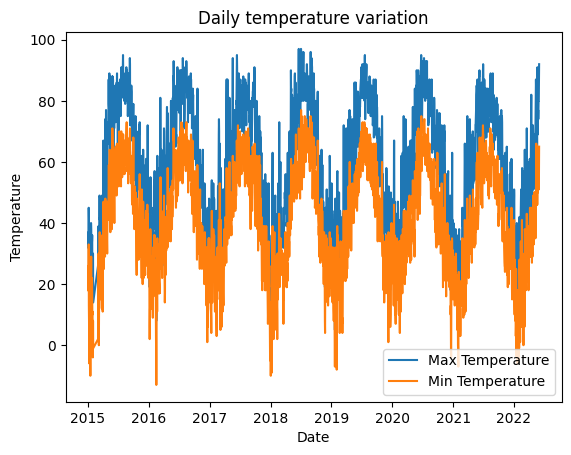

In [44]:
# daily temperature variation
plt.plot(daily['DATE'],daily['DailyMaximumDryBulbTemperature'],label='Max Temperature')
plt.plot(daily['DATE'],daily['DailyMinimumDryBulbTemperature'],label='Min Temperature')
plt.title("Daily temperature variation")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

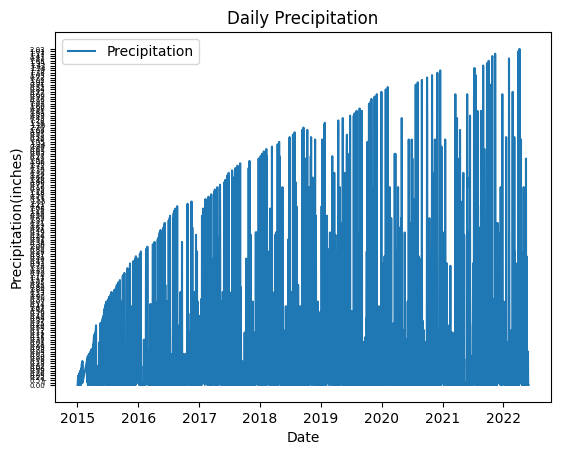

In [43]:
# Daily Precipitation
plt.plot(daily['DATE'],daily['DailyPrecipitation'],label='Precipitation')
plt.title("Daily Precipitation")
plt.xlabel('Date')
plt.ylabel('Precipitation(inches)')
plt.yticks(fontsize=5)
plt.legend()
plt.show()

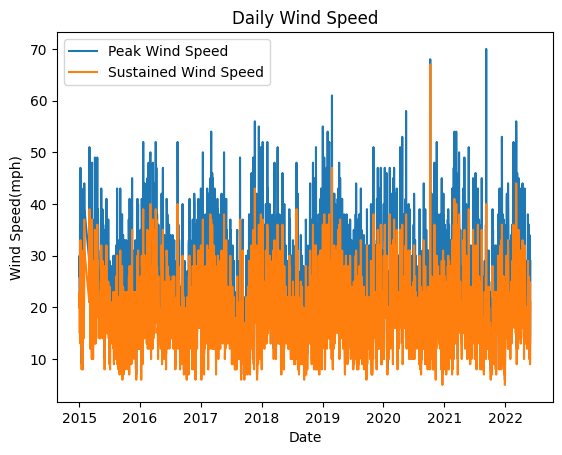

In [42]:
# Daily wind speed
plt.plot(daily['DATE'],daily['DailyPeakWindSpeed'],label='Peak Wind Speed')
plt.plot(daily['DATE'],daily['DailySustainedWindSpeed'],label='Sustained Wind Speed')
plt.title("Daily Wind Speed")
plt.xlabel('Date')
plt.ylabel('Wind Speed(mph)')
plt.legend()
plt.show()

In [39]:
# convert non-numeric values to NaN
hourly['HourlyDryBulbTemperature']=pd.to_numeric(hourly['HourlyDryBulbTemperature'],errors='coerce')

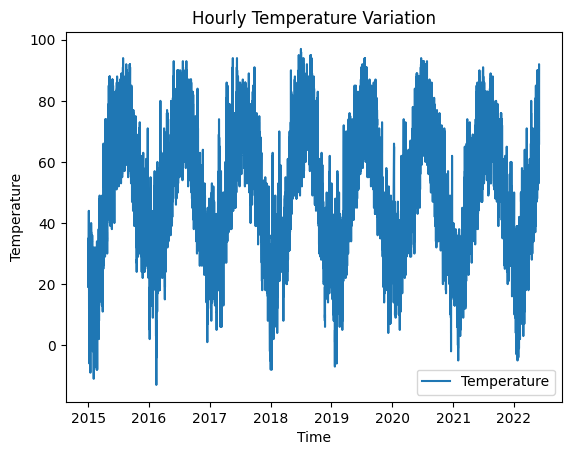

In [41]:
# plot after handling non-numeric values
# Hourly Temperature Variation
plt.plot(hourly['DATE'],hourly['HourlyDryBulbTemperature'],label='Temperature')
plt.title("Hourly Temperature Variation")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

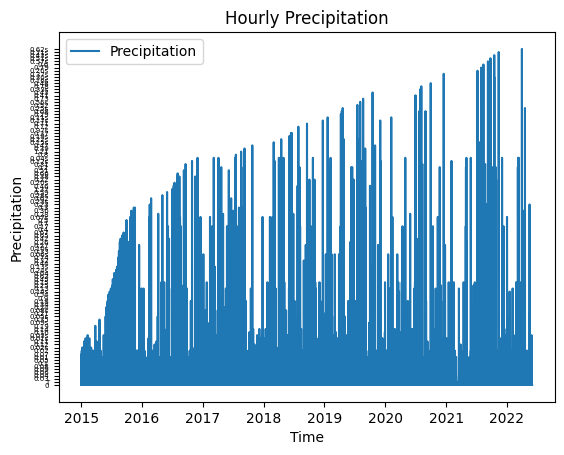

In [46]:
# Hourly Precipitation
plt.plot(hourly['DATE'],hourly['HourlyPrecipitation'],label='Precipitation')
plt.title("Hourly Precipitation")
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.yticks(fontsize=5)
plt.legend()
plt.show()

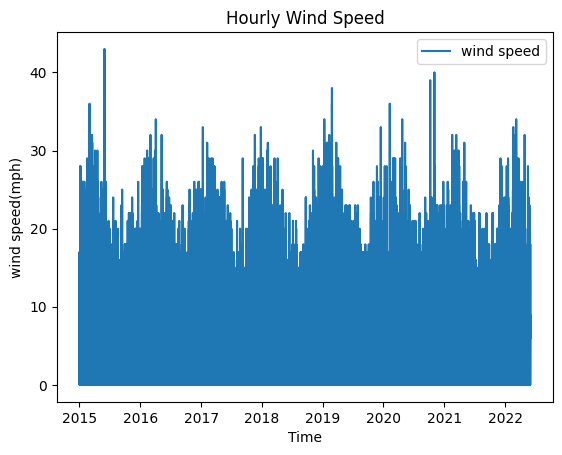

In [47]:
# Hourly wind speed
plt.plot(hourly['DATE'],hourly['HourlyWindSpeed'],label='wind speed')
plt.title("Hourly Wind Speed")
plt.xlabel('Time')
plt.ylabel('wind speed(mph)')
plt.legend()
plt.show()

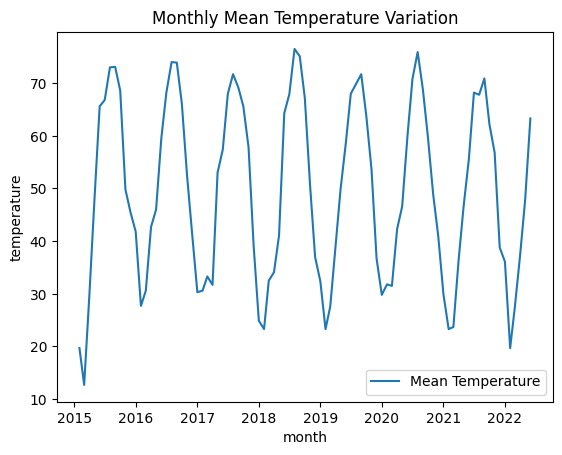

In [48]:
# Monthly temperature variation
plt.plot(monthly['DATE'],monthly['MonthlyMeanTemperature'],label='Mean Temperature')
plt.title("Monthly Mean Temperature Variation")
plt.xlabel('month')
plt.ylabel('temperature')
plt.legend()
plt.show()

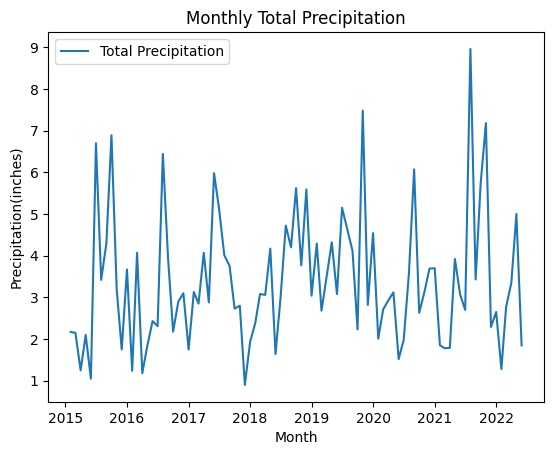

In [50]:
plt.plot(monthly['DATE'],monthly['MonthlyTotalLiquidPrecipitation'],label='Total Precipitation')
plt.title("Monthly Total Precipitation")
plt.xlabel('Month')
plt.ylabel('Precipitation(inches)')
plt.legend()
plt.show()

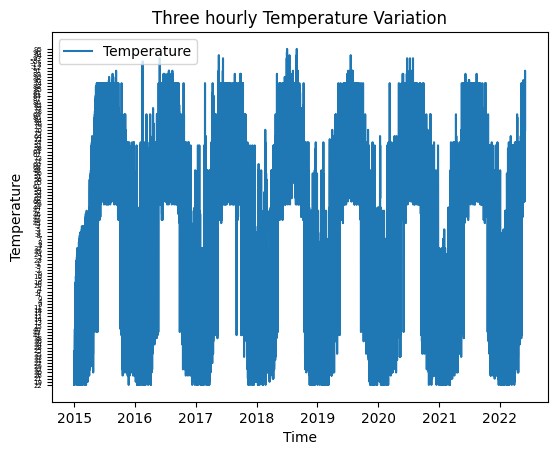

In [52]:
# Three hourly Temperature Variation
plt.plot(three_hour['DATE'],three_hour['HourlyDryBulbTemperature'],label='Temperature')
plt.title("Three hourly Temperature Variation")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.yticks(fontsize=5)
plt.legend()
plt.show()

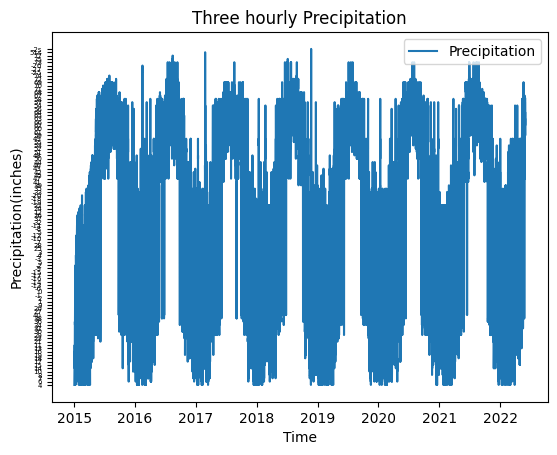

In [53]:
# Three hourly Precipitation
plt.plot(three_hour['DATE'],three_hour['HourlyDewPointTemperature'],label='Precipitation')
plt.title("Three hourly Precipitation")
plt.xlabel('Time')
plt.ylabel('Precipitation(inches)')
plt.yticks(fontsize=5)
plt.legend()
plt.show()

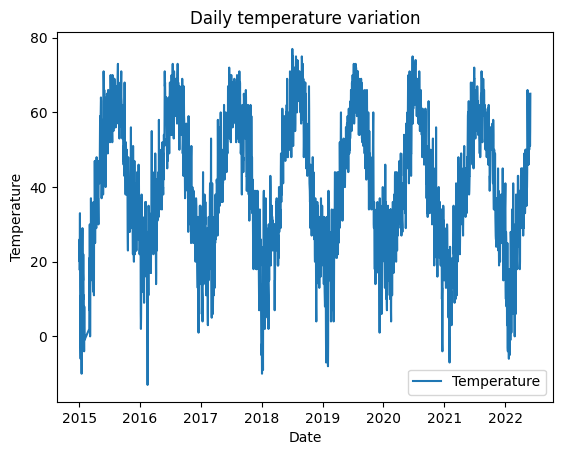

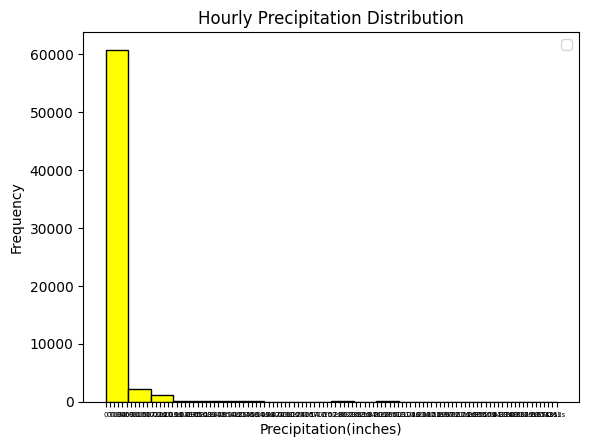

In [59]:
# visualize the data using plots like time series plots, histogram and boxplots

# Time series data for Daily data
plt.plot(daily['DATE'],daily['DailyMinimumDryBulbTemperature'],label='Temperature')
plt.title("Daily temperature variation")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Histogram for hourly data
plt.hist(hourly['HourlyPrecipitation'].dropna(),bins=20,color='yellow',edgecolor='black')
plt.title("Hourly Precipitation Distribution")
plt.xlabel('Precipitation(inches)')
plt.ylabel('Frequency')
plt.xticks(fontsize=5)
plt.legend()
plt.show()

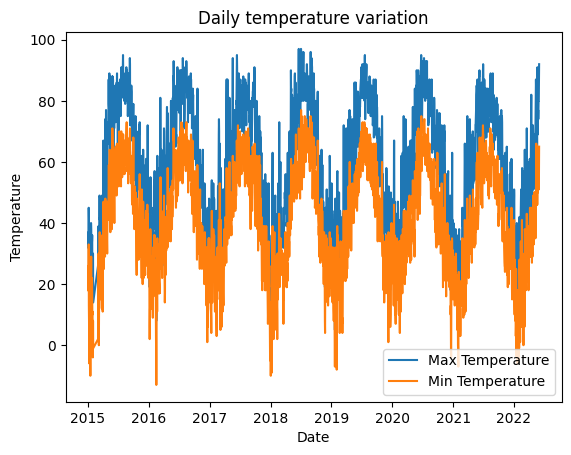

In [60]:
# Example: Time series plot for temperature

plt.plot(daily['DATE'],daily['DailyMaximumDryBulbTemperature'],label='Max Temperature')
plt.plot(daily['DATE'],daily['DailyMinimumDryBulbTemperature'],label='Min Temperature')
plt.title("Daily temperature variation")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [62]:
# Assuming 'daily' DataFrame contains your climate data

# convert 'DATE' column to DATETIME formate
daily['DATE']=pd.to_datetime(daily['DATE'])

# extract year and month from the date
daily['Year']=daily['DATE'].dt.year
daily['Month']=daily['DATE'].dt.month

# define a function to map month to season
def map_to_season(month):
  if month in [12,1,2]:     # Winter: [December, January, February]
    return 'Winter'
  elif month in [3,4,5]:    # Spring: [March, April, May]
    return 'Spring'
  elif month in [6,7,8]:    # Summer: [June, July, August]
    return 'Summer'
  else:                     # Fall: [September, October, November]
    return 'Fall'

# apply the function to create a new 'season' column
daily['Season']=daily['Month'].apply(map_to_season)

# aggregate data by season and year to calculate mean temperature
seasonal = daily.groupby(['Year','Season']).agg({'DailyMaximumDryBulbTemperature':'mean'}).reset_index()

In [63]:
# pivot the data for plotting
seasonal_pivot = seasonal.pivot(index='Year', columns='Season', values='DailyMaximumDryBulbTemperature')

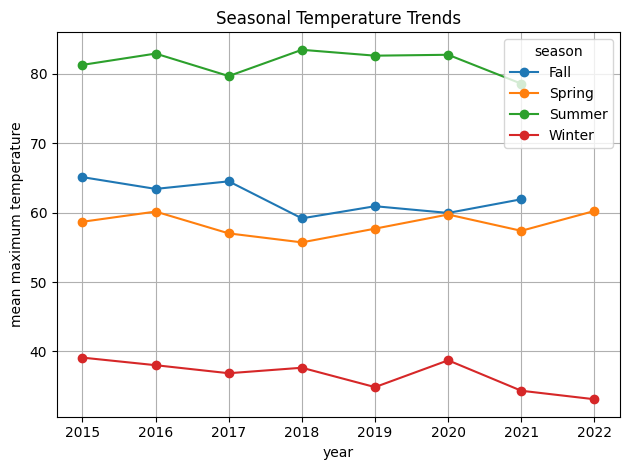

In [66]:
# plot for seasonal trends
seasonal_pivot.plot(marker='o')
plt.title("Seasonal Temperature Trends")
plt.xlabel('year')
plt.ylabel('mean maximum temperature')
plt.xticks(seasonal_pivot.index)
plt.grid(True)
plt.legend(title='season')
plt.tight_layout()
plt.show()

In [67]:
# Assuming 'daily' DataFrame contains your daily climate data

# calculate rolling mean of temperature for a specified window (eg. 7 days)
window = 7
daily['RollingMeanTemperature']=daily['DailyMaximumDryBulbTemperature'].rolling(window=window).mean()

# define a threshold for defining heatwaves (eg.mean temperature above 90°F for 3 consecutive days)
heatwave_threshould = 90
consecutive_days_threshould = 3

# identify periods of consecutive days above the threshould
heatwave_mask = daily['RollingMeanTemperature']>heatwave_threshould
heatwave_periods = daily.groupby(heatwave_mask.ne(heatwave_mask.shift()).cumsum()).filter(lambda x: len(x) >= consecutive_days_threshould)

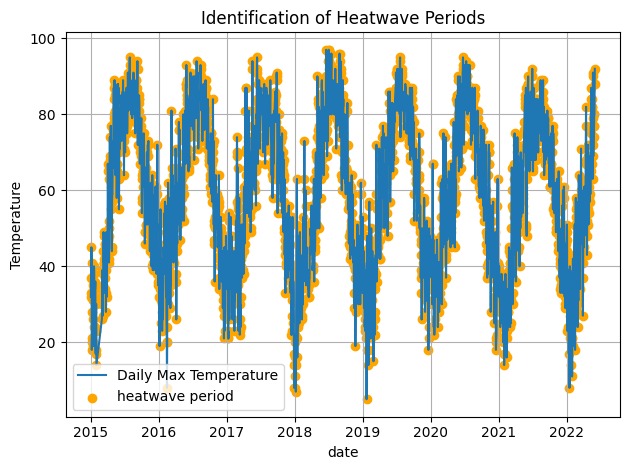

In [71]:
# plot for identified heatwave periods
plt.plot(daily['DATE'],daily['DailyMaximumDryBulbTemperature'], label='Daily Max Temperature')
plt.scatter(heatwave_periods['DATE'],heatwave_periods['DailyMaximumDryBulbTemperature'],color='orange',label='heatwave period')
plt.title("Identification of Heatwave Periods")
plt.xlabel('date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
from scipy.stats import linregress

# extract 'YEAR' from the 'DATE'
daily['Year']= daily['DATE'].dt.year

# group by year and calculate the mean temperature
annual_mean_temperature = daily.groupby('Year')['DailyMaximumDryBulbTemperature'].mean()

In [76]:
# perform linear regression to find the trend
slope, intercept, r_value, p_value, std_err = linregress(annual_mean_temperature.index, annual_mean_temperature)

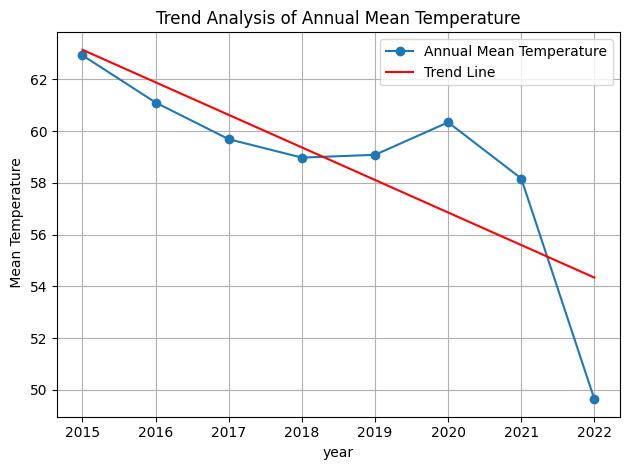

In [77]:
# plot for data and regression line
plt.plot(annual_mean_temperature.index, annual_mean_temperature, marker='o', label='Annual Mean Temperature')
plt.plot(annual_mean_temperature.index, intercept + slope * annual_mean_temperature.index, 'r', label='Trend Line')
plt.title("Trend Analysis of Annual Mean Temperature")
plt.xlabel('year')
plt.ylabel(' Mean Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
# print the slope(trend) and p-value(significance)
print(f"Trend(slope): {slope:.2f} *f per year")
print(f"P-value: {p_value:.2f}")

Trend(slope): -1.26 *f per year
P-value: 0.02


In [81]:
# select numeric columns for correlation analysis
numeric_columns = daily.select_dtypes(include='number')

In [82]:
# calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

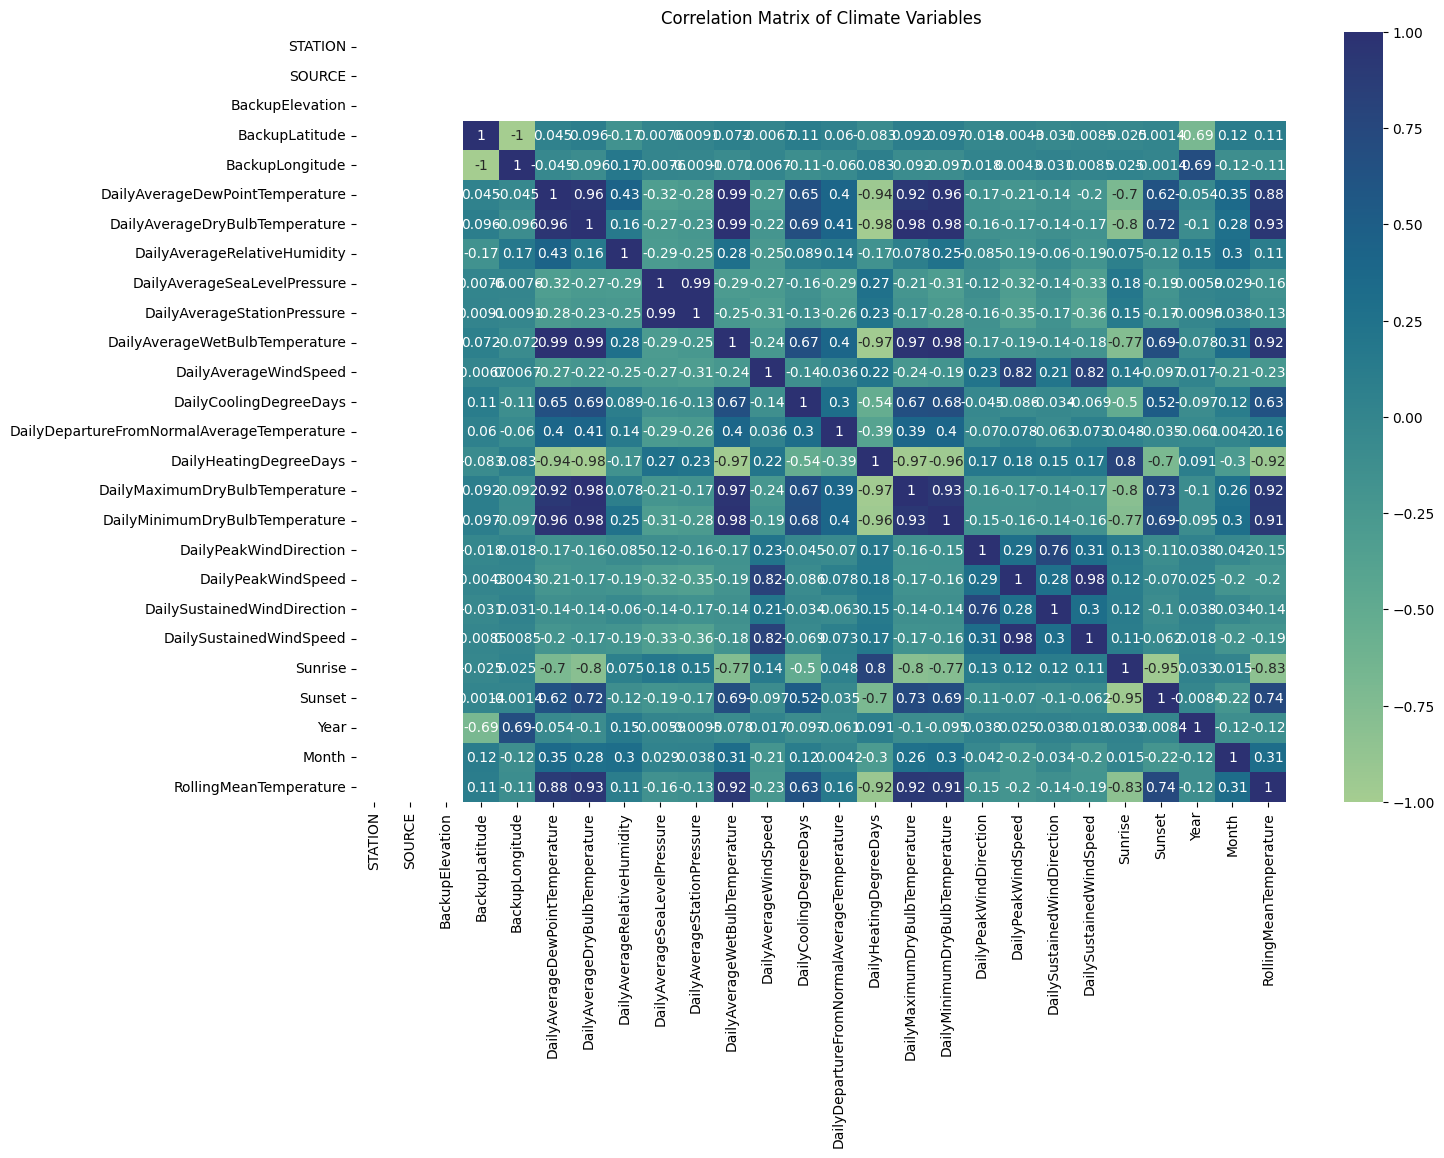

In [85]:
# plot for correlation matrix as a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title("Correlation Matrix of Climate Variables")
plt.show()

In [87]:
# conduct hypothesis testing to quantify relationships and identify significant changes
from scipy.stats import ttest_ind

# hypothesis test for difference in mean temperature between two time periods
group1 = daily[daily['Year'] < 2000]['DailyAverageDryBulbTemperature']
group2 = daily[daily['Year'] >= 2000]['DailyAverageDryBulbTemperature']
t_stat, p_value = ttest_ind(group1, group2)
print("Hypothesis Test for Difference in mean temperature:")
print("T-Statistics:",t_stat)
print("P-value:",p_value)

Hypothesis Test for Difference in mean temperature:
T-Statistics: nan
P-value: nan


In [90]:
# filter out rows where 'DailyAveargeWindSpeed' is not null
filtered = daily[daily['DailyAverageWindSpeed'].notnull()]

# group data by date and calculate the daily average wind speed
daily_avg_wind_speed = filtered.groupby('DATE')['DailyAverageWindSpeed'].mean()

In [94]:
# print the first few rows of the result
print(daily_avg_wind_speed)

DATE
2015-01-01 23:59:00     8.8
2015-01-02 23:59:00     9.5
2015-01-03 23:59:00     4.3
2015-01-04 23:59:00    10.0
2015-01-05 23:59:00    16.8
                       ... 
2022-05-27 23:59:00    12.7
2022-05-28 23:59:00     7.6
2022-05-29 23:59:00     2.2
2022-05-30 23:59:00     3.4
2022-05-31 23:59:00     8.4
Name: DailyAverageWindSpeed, Length: 2668, dtype: float64


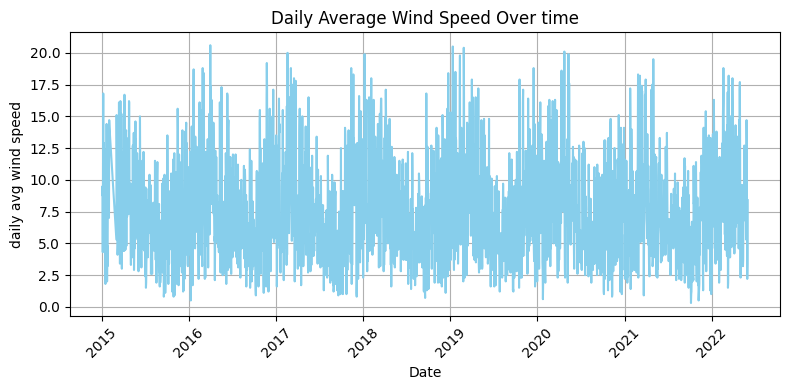

In [117]:
# plotting the data
plt.figure(figsize=(8,4))
plt.plot(daily_avg_wind_speed.index, daily_avg_wind_speed.values, color='skyblue')
plt.title("Daily Average Wind Speed Over time")
plt.xlabel('Date')
plt.ylabel('daily avg wind speed')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
# filter out rows where 'DailyPeakWindDirection' is not null
filtered = daily[daily['DailyPeakWindDirection'].notnull()]

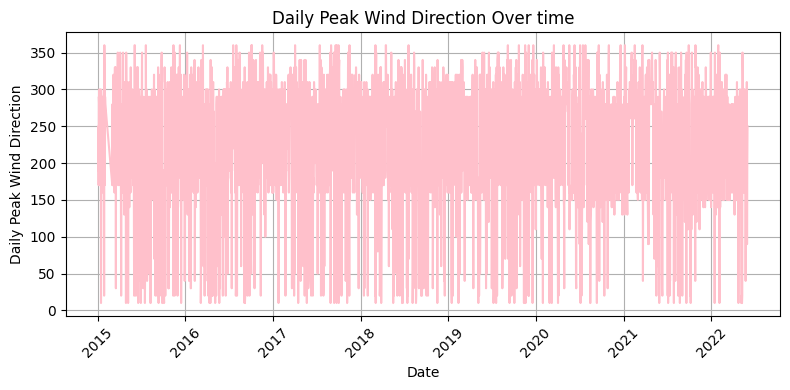

In [116]:
# plotting the data
plt.figure(figsize=(8,4))
plt.plot(filtered['DATE'], filtered['DailyPeakWindDirection'], color='pink')
plt.title("Daily Peak Wind Direction Over time")
plt.xlabel('Date')
plt.ylabel('Daily Peak Wind Direction')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [118]:
# count occurrences of weather sources in each dataset
daily_source_counts = daily['SOURCE'].value_counts()
hourly_source_counts = hourly['SOURCE'].value_counts()
monthly_source_counts = monthly['SOURCE'].value_counts()
three_hour_source_counts = three_hour['SOURCE'].value_counts()

In [119]:
# combine counts from all datasets
all_source_counts = daily_source_counts.add(hourly_source_counts, fill_value=0)
all_source_counts = all_source_counts.add(monthly_source_counts, fill_value=0)
all_source_counts = all_source_counts.add(three_hour_source_counts, fill_value=0)

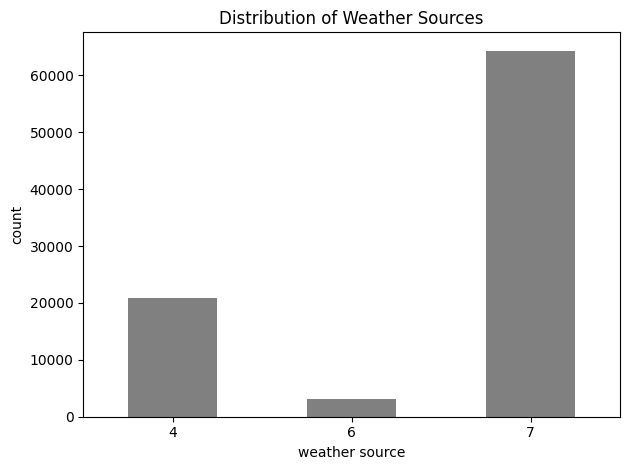

In [128]:
# plotting the data
all_source_counts.plot(kind='bar',color='gray')
plt.title("Distribution of Weather Sources")
plt.xlabel('weather source')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [129]:
# count occurrence of report types in each dataset
daily_report_counts = daily['REPORT_TYPE'].value_counts()
hourly_report_counts = hourly['REPORT_TYPE'].value_counts()
monthly_report_counts = monthly['REPORT_TYPE'].value_counts()
three_hour_report_counts = three_hour['REPORT_TYPE'].value_counts()

In [130]:
# combine counts from all datasets
all_report_counts = daily_report_counts.add(hourly_report_counts, fill_value=0)
all_report_counts = all_report_counts.add(monthly_report_counts, fill_value=0)
all_report_counts = all_report_counts.add(three_hour_report_counts, fill_value=0)

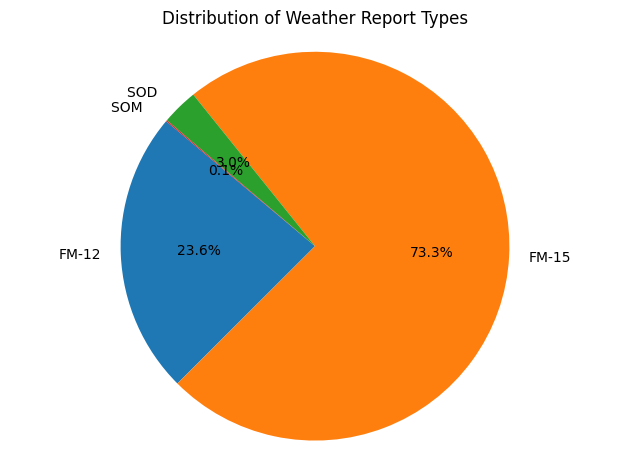

In [134]:
# plotting the data
plt.pie(all_report_counts, labels=all_report_counts.index, autopct='%1.1f%%',startangle=140)
plt.title("Distribution of Weather Report Types")
plt.axis('equal')
plt.tight_layout()
plt.show()



*   **Temporal Trends:** Identified long-term trends and seasonal patterns in temperature, precipitation, and wind speed.
*   **Extreme Events:** Analyzed extreme weather events such as storms, heatwaves, and cold snaps to understand their frequency and intensity.


*   **Correlation Analysis:** Explored correlations between different climate variables to understand their relationships.
*   **Spatial Analysis:** Visualized spatial patterns in climate variables using maps to identify regional variations.


The analysis provides valuable insights into historical climate patterns and trends, enhancing our understanding of weather conditions over time.

